In [1]:
# UNAD
#Ejercicio de Regresion Lineal para predecir el valor de un vehiculo teniendo en cuenta alguras de sus caracteristicas de acuerdo al datasheet requerido
#para el ejercicio

In [2]:
#Importacion de librerias requeridas
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('./Car details v3.csv')

In [4]:
# Realizamos lectura de los Datos para el análisis exploratorio
data.head(50)

,Nombre,Ano,Precio_Venta,Kilometraje,Combustible,Tipo_vendedor,transmision,Duenos,Kilometros_litro,Motor_CC,Maximo_poder,Torque,Asientos
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75nm@ 4000rpm,5
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061,57.50,"7.8@ 4,500(kgm@ rpm)",5
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796,37.00,59Nm@ 2500rpm,4
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364,67.10,170Nm@ 1800-2400rpm,5
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399,68.10,160Nm@ 2000rpm,5


In [5]:
# Descripción de los datos
data.describe()

,Ano,Precio_Venta,Kilometraje,Kilometros_litro,Motor_CC,Maximo_poder,Asientos
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8127.00000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,18.890787,1417.938484,89.09681,5.269439
std,4.044249,8.062534e+05,5.655055e+04,5.082403,551.881439,38.27582,1.293039
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.395000,1196.000000,67.10000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.100000,1248.000000,81.86000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.277500,1582.000000,101.50000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.00000,14.000000


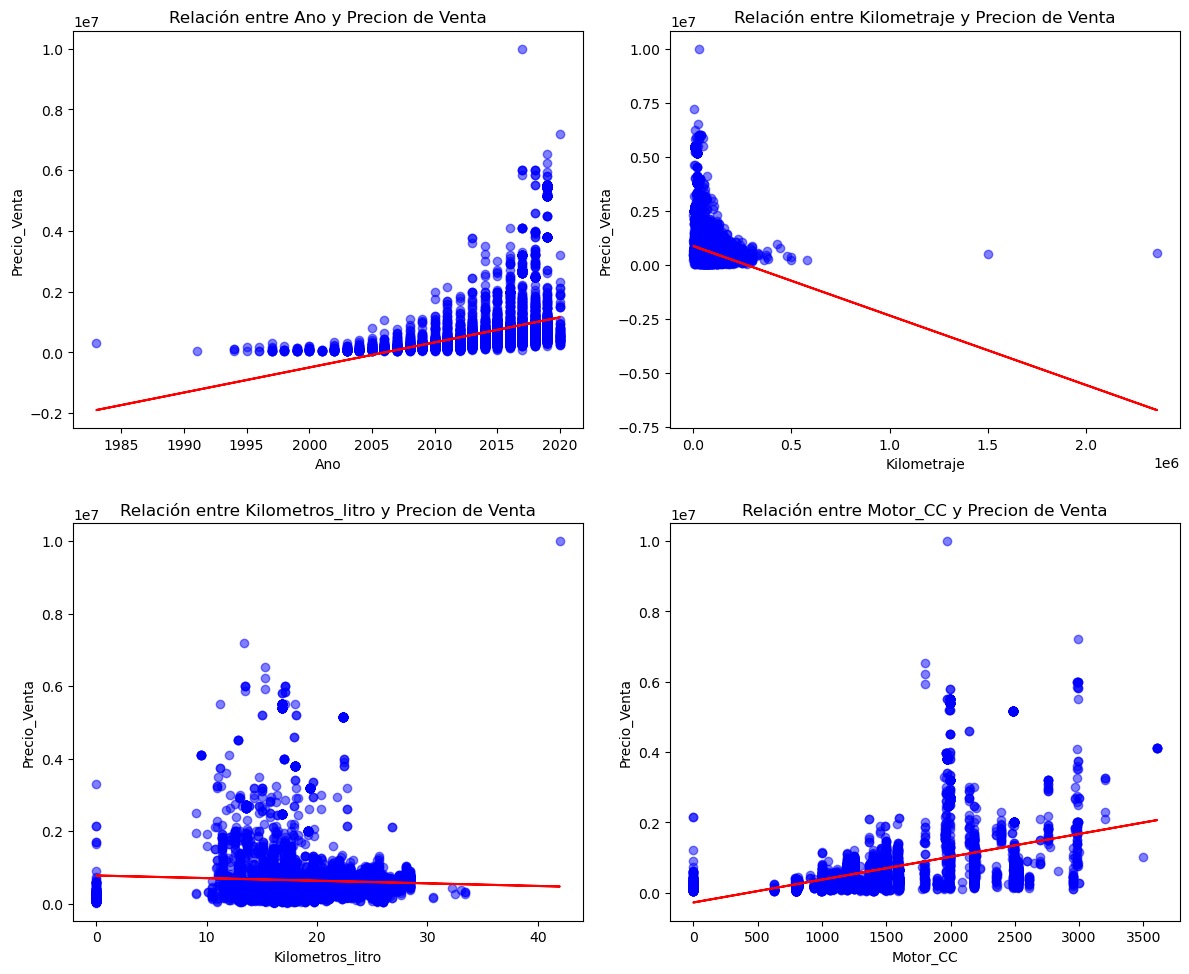

In [6]:
# Graficar su relación con el precio de ventas del vehículo
fig, axs = plt.subplots(2, 2, figsize=(12, 10))


features = ['Ano', 'Kilometraje', 'Kilometros_litro', 'Motor_CC']  # Agrega más características si es necesario
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    axs[row, col].scatter(data[feature], data['Precio_Venta'], color='blue', alpha=0.5)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Precio_Venta')
    axs[row, col].set_title('Relación entre {} y Precion de Venta'.format(feature))

    # Ajustar una regresión lineal
    model = LinearRegression()
    model.fit(data[[feature]], data['Precio_Venta'])
    y_pred = model.predict(data[[feature]])
    axs[row, col].plot(data[feature], y_pred, color='red')

plt.tight_layout()
plt.show()

In [7]:
#Validacion de datos faltantes o descriminados con 0
print("Cantidad de Registros con cero en Kilometros por litro: ",data['Kilometros_litro'].isin([0]).sum())
print("Cantidad de Registros con cero en Cilindraje: ",data['Motor_CC'].isin([0]).sum())
print("Cantidad de Registros con cero en Caballos de potencias PH: ",data['Maximo_poder'].isin([0]).sum())
print("Cantidad de Registros con cero en Cantidad de asientos: ",data['Asientos'].isin([0]).sum())

Cantidad de Registros con cero en Kilometros por litro:  238
Cantidad de Registros con cero en Cilindraje:  227
Cantidad de Registros con cero en Caballos de potencias PH:  221
Cantidad de Registros con cero en Cantidad de asientos:  221


In [8]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

data['Kilometros_litro']=data['Kilometros_litro'].replace(0,data['Kilometros_litro'].mean())
data['Motor_CC']=data['Motor_CC'].replace(0,data['Motor_CC'].mean())
data['Maximo_poder']=data['Maximo_poder'].replace(0,data['Maximo_poder'].mean())
data['Asientos']=data['Asientos'].replace(0,data['Asientos'].mean())

In [9]:
#Verificacion de datos con 0
print("Cantidad de Registros con cero en Kilometros por litro: ",data['Kilometros_litro'].isin([0]).sum())
print("Cantidad de Registros con cero en Cilindraje: ",data['Motor_CC'].isin([0]).sum())
print("Cantidad de Registros con cero en Caballos de potencias PH: ",data['Maximo_poder'].isin([0]).sum())
print("Cantidad de Registros con cero en Cantidad de asientos: ",data['Asientos'].isin([0]).sum())

Cantidad de Registros con cero en Kilometros por litro:  0
Cantidad de Registros con cero en Cilindraje:  0
Cantidad de Registros con cero en Caballos de potencias PH:  0
Cantidad de Registros con cero en Cantidad de asientos:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

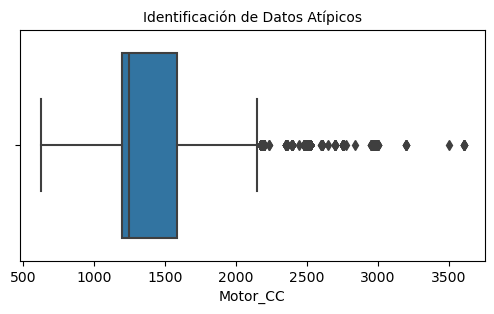

In [10]:
#Identificación de Datos Atípicos
import seaborn as sns # Creación gráficos estadísticos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Motor_CC'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [13]:
#Conteo de Datos Atípicos

nivel_minimo=35000
nivel_maximo=680000
Total_Atipicos=((data['Motor_CC']<nivel_minimo)|(data['Precio_Venta']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 6098


In [14]:
# Filtra Datos Atípicos

data=data[(data['Precio_Venta']<nivel_maximo)&(data['Precio_Venta']>nivel_minimo)]

In [15]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((data['Precio_Venta']<nivel_minimo)|(data['Precio_Venta']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


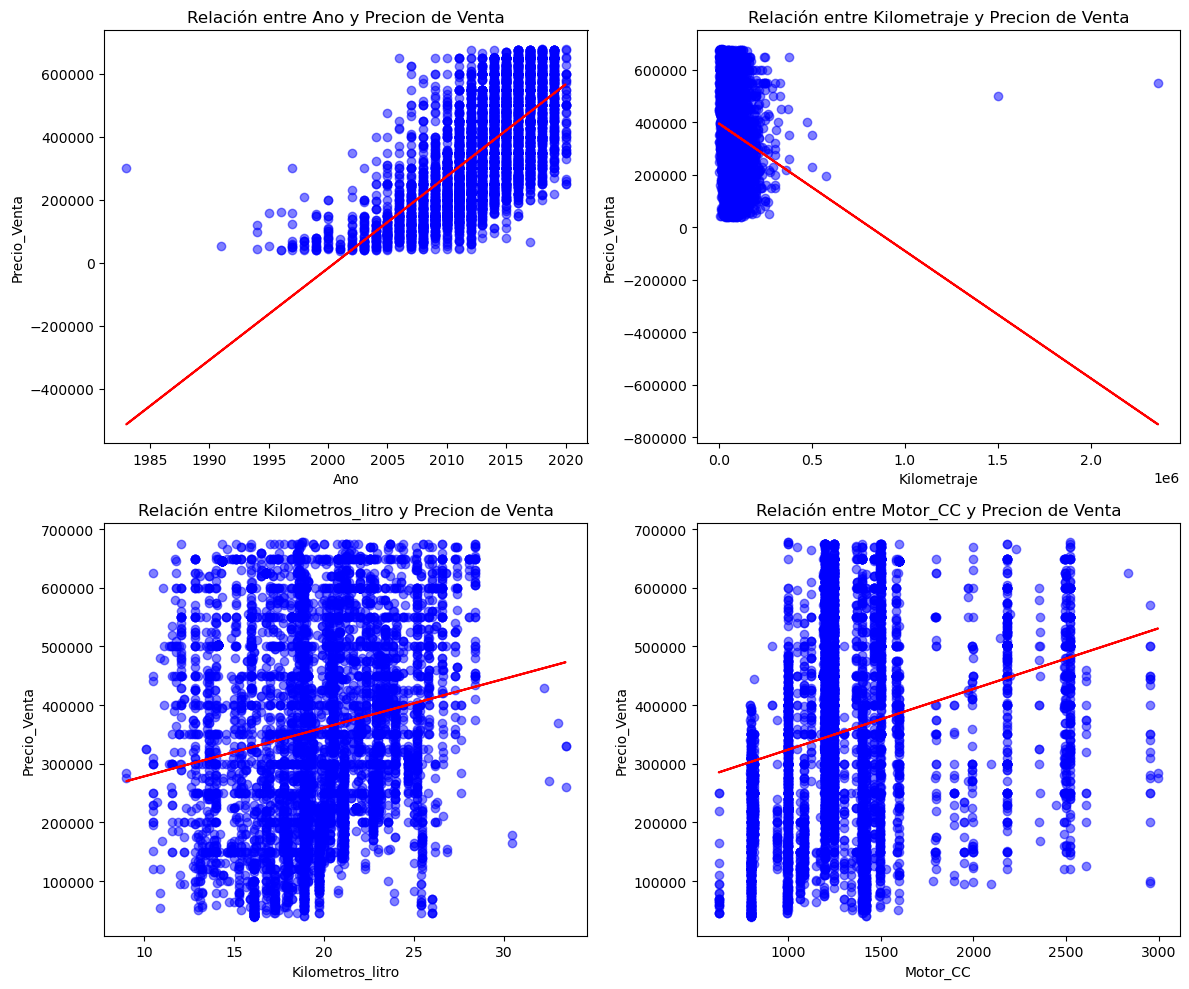

In [16]:
# Crear subgráficos y determinar los cambios realizados en el datasheet para mejorar el funcionamiento del algoritmo
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

features = ['Ano', 'Kilometraje', 'Kilometros_litro', 'Motor_CC']  # Agrega más características si es necesario
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    axs[row, col].scatter(data[feature], data['Precio_Venta'], color='blue', alpha=0.5)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Precio_Venta')
    axs[row, col].set_title('Relación entre {} y Precion de Venta'.format(feature))

    # Ajustar una regresión lineal
    model = LinearRegression()
    model.fit(data[[feature]], data['Precio_Venta'])
    y_pred = model.predict(data[[feature]])
    axs[row, col].plot(data[feature], y_pred, color='red')

plt.tight_layout()
plt.show()

In [17]:
#Revisión del tipo de datos y datos faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6098 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nombre            6098 non-null   object 
 1   Ano               6098 non-null   int64  
 2   Precio_Venta      6098 non-null   int64  
 3   Kilometraje       6098 non-null   int64  
 4   Combustible       6098 non-null   object 
 5   Tipo_vendedor     6098 non-null   object 
 6   transmision       6098 non-null   object 
 7   Duenos            6098 non-null   object 
 8   Kilometros_litro  6098 non-null   float64
 9   Motor_CC          6098 non-null   float64
 10  Maximo_poder      6097 non-null   float64
 11  Torque            6098 non-null   object 
 12  Asientos          6098 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 667.0+ KB


In [18]:
# Total de personas con Diabetes

data['Precio_Venta'].value_counts()

Precio_Venta
300000    227
600000    213
350000    209
550000    204
450000    195
         ... 
112999      1
39000       1
92000       1
308000      1
307000      1
Name: count, Length: 393, dtype: int64

In [19]:
# Seleccionar características (X) y variable dependiente (y)
X = data[['Ano', 'Kilometraje', 'Kilometros_litro', 'Motor_CC']]  # Puedes incluir más características si las tienes
y = data['Precio_Venta']

In [20]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Crear el modelo de regresión lineal
model = LinearRegression()

In [22]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Hacer predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

In [24]:
# Calcular el error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 109545.60614249585


In [25]:
# Calcular el coeficiente de determinación (R-cuadrado)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

R^2: 0.5823421307362966


In [26]:
# Calcular el error absoluto medio (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

MAE: 87920.74303505327


In [27]:
# Ejemplo de predicción para el valor de vehiculo con las siguientes caracteristicas
nuevo_vehiculo = [[2010, 50000, 23.4, 1248]]
valor_predicho = model.predict(nuevo_vehiculo)
print('Valor predicho para el nuevo vehículo:', valor_predicho[0])

Valor predicho para el nuevo vehículo: 275112.52528942376


C:\Users\FOX\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


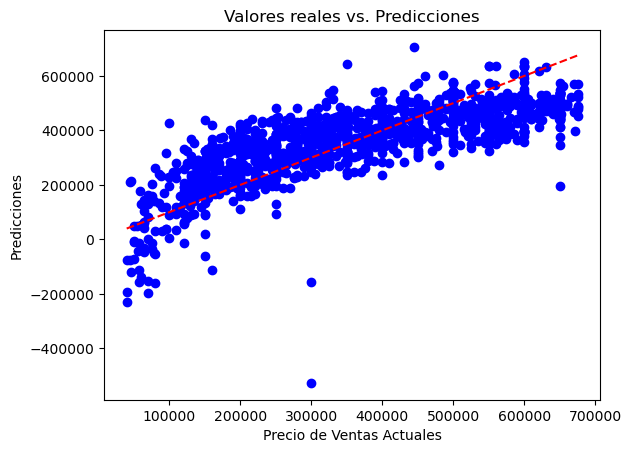

In [28]:
# Graficar los precios regstrados vs. las predicciones
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Precio de Ventas Actuales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs. Predicciones')
plt.show()